<a href="https://colab.research.google.com/github/muhammedmusa16/code/blob/main/Scraping_%2Ctext_processing_and_vader_sentiment_analysis_PlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Needed
####-google-play-scraper
####-pandas
####-numpy

In [ ]:
#if u haven't install the google-play scrapper library u can install it by this code:
!pip install google-play-scraper

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.5-py3-none-any.whl size=24484 sha256=bb7429a8902ce12216907f1928f18d6c7cbb5bf7802ddae0d69e64a0c57be718
  Stored in directory: /root/.cache/pip/wheels/4a/26/18/48fda51f20c9e550c735fa6f3a6887dc8836f8d709a3cf8a9c
Successfully built google-play-scraper


In [ ]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Scraping Code

###Scrape all reviews

In [ ]:
result = reviews_all(
    'ng.mtn.nextgen',
    sleep_milliseconds=0, # defaults to 0
    lang='NG',            # defaults to 'en'
    country='NG',         # defaults to 'us'
    sort=Sort.NEWEST,     # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

###Scrape desired count reviews

In [ ]:
result, continuation_token = reviews(
    'ng.mtn.nextgen',
    lang='NG',                # defaults to 'en'
    country='NG',             # defaults to 'us'
    sort=Sort.MOST_RELEVANT,  # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=2000,               # defaults to 100
    filter_score_with=None    # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

##Scraping Result

###code to see the preview data

In [ ]:
#@title
scrapeddata = pd.DataFrame(np.array(result),columns=['review'])

scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHvHf12eD-jJgZoa3ILJ7kgic__-i7lAyohz43...,Tunde-sanni AbdulHameed,https://play-lh.googleusercontent.com/a-/AOh14...,"Firstly, You can't explore the app without dat...",3,229,1.3.5,2022-05-01 18:22:29,None,NaT
1,gp:AOqpTOEvNLhYTyO3Ki44OyGOrZCNPP1aQLK3SVcpPA7...,Umar Mairamri,https://play-lh.googleusercontent.com/a-/AOh14...,"If it ain't broke, don't fix it! Your former A...",1,1080,1.3.3,2022-03-14 10:53:51,None,NaT
2,gp:AOqpTOGwxZTktB293LVR7_FgdetzyDS-UniTXTS-EE2...,Nuel Oyebade,https://play-lh.googleusercontent.com/a-/AOh14...,The previous MTN app was much better than this...,1,721,1.3.4,2022-03-31 02:45:44,"Y'ello Nuel,\nThank you for the feedback.\nYou...",2022-04-02 14:33:17
3,gp:AOqpTOHT5qYyPi525F_E9R2Dz5H3RVywAmuYz30KaHC...,Ifeanyi Ndu,https://play-lh.googleusercontent.com/a-/AOh14...,You can only add beneficiary. You can't link n...,1,73,1.3.5,2022-05-07 10:49:25,None,NaT
4,gp:AOqpTOF6f6R8rr702pgJgsxrOBN3jUF50IOlTjwlsPT...,Dorcas Etim,https://play-lh.googleusercontent.com/a-/AOh14...,I wish I could even rate no star at all. The f...,1,5,1.3.5,2022-05-11 18:30:32,"Y'ello Dorcas,\nApologies for the challenges e...",2022-05-12 08:46:35


### code to see the count the data tht we got:

In [ ]:
#@title
len(scrapeddata.index)

1992

###Filtering the scrapped data

In [ ]:
#@title
scrapeddata[['content','score','at']].head() 

,content,score,at
0,"Firstly, You can't explore the app without dat...",3,2022-05-01 18:22:29
1,"If it ain't broke, don't fix it! Your former A...",1,2022-03-14 10:53:51
2,The previous MTN app was much better than this...,1,2022-03-31 02:45:44
3,You can only add beneficiary. You can't link n...,1,2022-05-07 10:49:25
4,I wish I could even rate no star at all. The f...,1,2022-05-11 18:30:32


###code to sort the date (if we want to)

In [ ]:
#@title
scrappeddata1 = scrapeddata[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=False) #Sort by Newest, change to True if you want to sort by Oldest.
sorteddata.head()

,content,score,at
1397,Great app,5,2022-05-18 04:53:37
1502,Convenient,4,2022-05-18 03:53:49
1388,Please this app is not working good like your ...,1,2022-05-18 03:44:44
1368,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39
1404,A very stupid application!!!,1,2022-05-17 23:03:07


##code to download/import our data to our device:

In [ ]:
sorteddata.to_excel("playstorescrapping.xlsx", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

In [ ]:
sorteddata.to_csv("playstorescrapping.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

Count Number of Review **Scores** bold text

In [ ]:
sorteddata.info

<bound method DataFrame.info of                                                 content  score  \
1397                                          Great app      5   
1502                                         Convenient      4   
1388  Please this app is not working good like your ...      1   
1368  The app is very worst compare to the previous ...      1   
1404                       A very stupid application!!!      1   
...                                                 ...    ...   
1835                                           Good app      3   
1807                                          It's good      4   
1054                        It's a bit slow in browsing      3   
947                      Nice interface and easy to use      5   
1868                                               Best      4   

                      at  
1397 2022-05-18 04:53:37  
1502 2022-05-18 03:53:49  
1388 2022-05-18 03:44:44  
1368 2022-05-18 01:43:39  
1404 2022-05-17 23:03:07  
...          

In [ ]:
sorteddata.head()

,content,score,at
1397,Great app,5,2022-05-18 04:53:37
1502,Convenient,4,2022-05-18 03:53:49
1388,Please this app is not working good like your ...,1,2022-05-18 03:44:44
1368,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39
1404,A very stupid application!!!,1,2022-05-17 23:03:07


In [ ]:
sorteddata['score'].value_counts()

1    919
5    731
4    122
2    114
3    106
Name: score, dtype: int64

In [ ]:
sorteddata['word_count']=sorteddata['content'].apply(lambda x: len(x.split()))
sorteddata.head()

,content,score,at,word_count
1397,Great app,5,2022-05-18 04:53:37,2
1502,Convenient,4,2022-05-18 03:53:49,1
1388,Please this app is not working good like your ...,1,2022-05-18 03:44:44,12
1368,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39,52
1404,A very stupid application!!!,1,2022-05-17 23:03:07,4


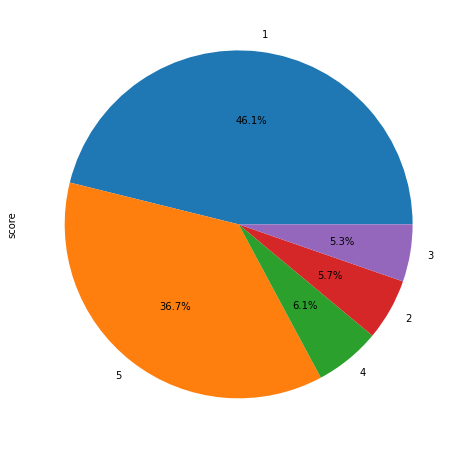

In [ ]:
sorteddata['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

How length of reviews vary with rating 

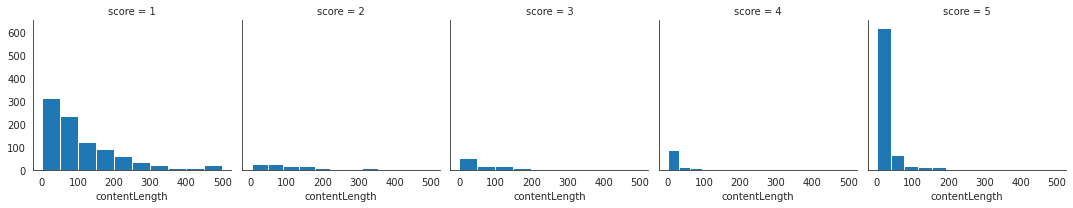

In [ ]:
#how does the length of ReviewText vary with Ratings
sorteddata['content'] = sorteddata['content'].astype(str)
sorteddata['contentLength'] = sorteddata['content'].apply(len)
sns.set_style('white')
g=sns.FacetGrid(sorteddata,col='score')
g.map(plt.hist,'contentLength')

In [ ]:
#pre-processing step we’ll do is transform all reviews in verified_reviews into lower case and create a new column new_reviews

In [ ]:
sorteddata['content'] = sorteddata['content'].str.replace('[^\w\s]','')
sorteddata['content'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


1397                                            Great app
1502                                           Convenient
1388    Please this app is not working good like your ...
1368    The app is very worst compare to the previous ...
1404                            A very stupid application
Name: content, dtype: object

To remove emojis

In [ ]:
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
sorteddata['new_reviews'] = sorteddata['content'].apply(lambda x: remove_emoji(x))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Removal of stopwords

In [ ]:
stop = stopwords.words('english')
sorteddata['new_reviews'] = sorteddata['new_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
sorteddata

,content,score,at,word_count,contentLength,new_reviews
1397,Great app,5,2022-05-18 04:53:37,2,9,Great app
1502,Convenient,4,2022-05-18 03:53:49,1,10,Convenient
1388,Please this app is not working good like your ...,1,2022-05-18 03:44:44,12,62,Please app working good like app
1368,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39,52,292,The app worst compare previous version I serio...
1404,A very stupid application,1,2022-05-17 23:03:07,4,28,A stupid application
...,...,...,...,...,...,...
1835,Good app,3,2021-12-09 11:58:55,2,8,Good app
1807,Its good,4,2021-12-02 04:32:38,2,9,Its good
1054,Its a bit slow in browsing,3,2021-12-02 03:05:35,6,27,Its bit slow browsing
947,Nice interface and easy to use,5,2021-11-25 15:17:11,6,30,Nice interface easy use


In [ ]:
def clean_text(text):
   text=re.sub(r"\?", ".", text)
   text=re.sub(r"\!", ".", text)
   text=re.sub(r'([.])\1+', r'\1', text)
   rexp=r"\.(?=[A-Za-z]{1,15})"
   text=re.sub(rexp, ". ", text)
   return text

TOKENIZING THE CUSTOMER REVIEWS

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sorteddata['CleanedReviewText'] = sorteddata['new_reviews'].apply(clean_text)           
                       
sorteddata['CleanedReviewText'] = sorteddata['CleanedReviewText'].apply(sent_tokenize)
sorteddata.head()       

,content,score,at,word_count,contentLength,new_reviews,CleanedReviewText
1397,Great app,5,2022-05-18 04:53:37,2,9,Great app,[Great app]
1502,Convenient,4,2022-05-18 03:53:49,1,10,Convenient,[Convenient]
1388,Please this app is not working good like your ...,1,2022-05-18 03:44:44,12,62,Please app working good like app,[Please app working good like app]
1368,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39,52,292,The app worst compare previous version I serio...,[The app worst compare previous version I seri...
1404,A very stupid application,1,2022-05-17 23:03:07,4,28,A stupid application,[A stupid application]


LEMMATIZING THE CUSTOMER REVIEW

In [ ]:
import textblob
import nltk
nltk.download('wordnet')
from textblob import Word
nltk.download('wordnet')

sorteddata['lemmatized']=sorteddata['new_reviews'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sorteddata.lemmatized.head

<bound method NDFrame.head of 1397                                            Great app
1502                                           Convenient
1388                     Please app working good like app
1368    The app worst compare previous version I serio...
1404                                 A stupid application
                              ...                        
1835                                             Good app
1807                                             Its good
1054                                Its bit slow browsing
947                               Nice interface easy use
1868                                                 Best
Name: lemmatized, Length: 1992, dtype: object>

Looking at the summary using word cloud

In [ ]:
! pip install wordcloud

In [ ]:
#from wordcloud import wordCloud
#from wordcloud import STOPWORDS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
sorteddata.score.value_counts()

1    919
5    731
4    122
2    114
3    106
Name: score, dtype: int64

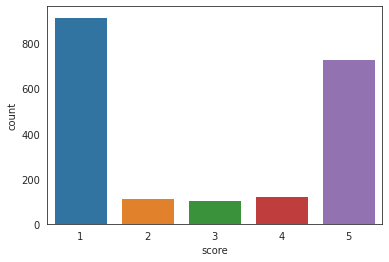

In [ ]:
sns.countplot(data=sorteddata, x ='score')

In [ ]:
stopwords = set(STOPWORDS)

There are 150397 words in the combination of all cells in column BLOOM.


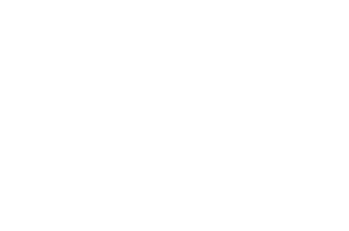

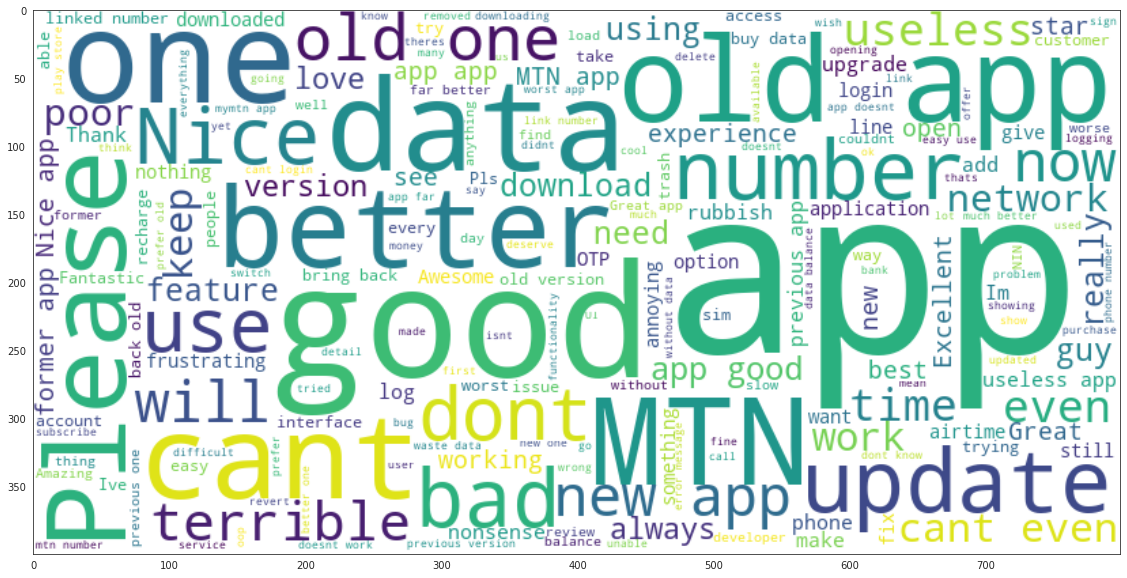

In [ ]:
text = " ".join(review for review in sorteddata.content.astype(str))
print ("There are {} words in the combination of all cells in column BLOOM.".format(len(text)))

# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
#stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
#create a new data frame "reviews" to perform exploratory dta analysis upon that
reviews = sorteddata
#droping null values
reviews.dropna(inplace=True)

In [ ]:
score_1 = reviews[reviews['score']==1]
score_2 = reviews[reviews['score']==2]
score_3 = reviews[reviews['score']==3]
score_4 = reviews[reviews['score']==4]
score_5 = reviews[reviews['score']==5]

In [ ]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5], axis =0)
reviews_sample.reset_index(drop=True, inplace=True)

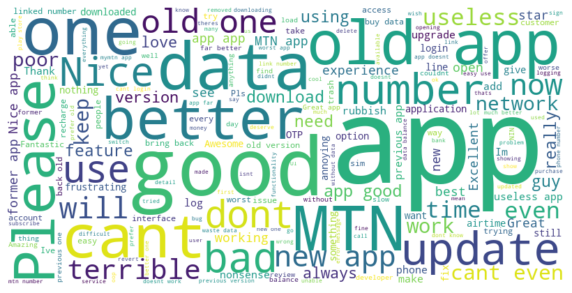

In [ ]:
#wordcloud function's  input needs to be a single string of text.
#concatenating all summaries into a single string
#similarly you can build for text column
reviews_str =reviews_sample.content.str.cat()
wordCloud= WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Now lets splith the data into Negative (score is 1 or 2) and Positive ( 4 or 5) reviews
negative_reviews = reviews_sample[reviews_sample['score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['score'].isin([4,5])]
#Transform to single string
negative_reviews_str=negative_reviews.content.str.cat()
positive_reviews_str=positive_reviews.content.str.cat()

WORD CLOUD FOR NEGATIVE AND POSTIVE REVIEW

Text(0.5, 1.0, 'Reviews with Negative Scores')

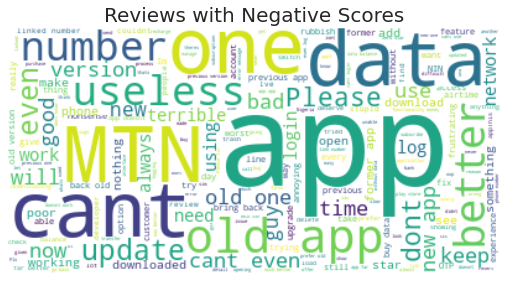

In [ ]:
wordCloud_negative=WordCloud(background_color='white').generate(negative_reviews_str)
wordCloud_positive=WordCloud(background_color='white').generate(positive_reviews_str)
#plot
fig = plt.figure(figsize=(10,10))
ax1 =fig.add_subplot(211)
ax1.imshow(wordCloud_negative,interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Text(0.5, 1.0, 'Reviews with Positive Scores')

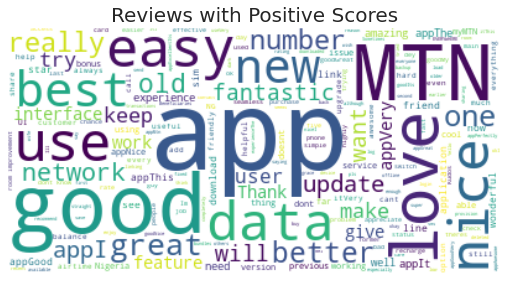

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 =fig.add_subplot(211)
ax1.imshow(wordCloud_positive,interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Positive Scores',fontsize=20)

Sentiment Score
Sentiment Analysis :

Pretrained Model takes input from the text description and outputs the sentiment score from -1 to +1 for each sentence Install vaderSentimeNT

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.9 MB/s 


In [ ]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentences=["hello","why is it not working?!"]
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
print (ss)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
#Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in sorteddata['lemmatized']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.196,0.804,0.6249
1,0.000,1.000,0.000,0.0000
2,0.000,0.280,0.720,0.7717
3,0.233,0.707,0.060,-0.7650
4,0.630,0.370,0.000,-0.5267


In [ ]:
# Merging the sentiments back to reviews dataframe
newdf = pd.concat([sorteddata.reset_index(drop=True), df_sentiments], axis=1)
newdf.head(20)

,content,score,at,word_count,contentLength,new_reviews,CleanedReviewText,lemmatized,neg,neu,pos,compound
0,Great app,5,2022-05-18 04:53:37,2,9,Great app,[Great app],Great app,0.000,0.196,0.804,0.6249
1,Convenient,4,2022-05-18 03:53:49,1,10,Convenient,[Convenient],Convenient,0.000,1.000,0.000,0.0000
2,Please this app is not working good like your ...,1,2022-05-18 03:44:44,12,62,Please app working good like app,[Please app working good like app],Please app working good like app,0.000,0.280,0.720,0.7717
3,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39,52,292,The app worst compare previous version I serio...,[The app worst compare previous version I seri...,The app worst compare previous version I serio...,0.233,0.707,0.060,-0.7650
4,A very stupid application,1,2022-05-17 23:03:07,4,28,A stupid application,[A stupid application],A stupid application,0.630,0.370,0.000,-0.5267
5,The app is very stupid since today Been gettin...,1,2022-05-17 22:51:46,38,192,The app stupid since today Been getting stupid...,[The app stupid since today Been getting stupi...,The app stupid since today Been getting stupid...,0.351,0.490,0.158,-0.7964
6,Whats with the bugs and all that You guys legi...,1,2022-05-17 22:39:03,24,119,Whats bugs You guys legit gave Tuesday offer I...,[Whats bugs You guys legit gave Tuesday offer ...,Whats bug You guy legit gave Tuesday offer I c...,0.000,0.846,0.154,0.3724
7,Positively the most useless annoyingly frustra...,1,2022-05-17 22:29:51,35,208,Positively useless annoyingly frustrating app ...,[Positively useless annoyingly frustrating app...,Positively useless annoyingly frustrating app ...,0.203,0.676,0.121,-0.3182
8,The file size is too large for its function an...,1,2022-05-17 22:19:42,20,110,The file size large function terrible app netw...,[The file size large function terrible app net...,The file size large function terrible app netw...,0.435,0.565,0.000,-0.7865
9,This upgrade is terribleit seems like anytime ...,1,2022-05-17 21:51:40,35,198,This upgrade terribleit seems like anytime the...,[This upgrade terribleit seems like anytime th...,This upgrade terribleit seems like anytime the...,0.179,0.730,0.091,-0.3400


In [ ]:
# Convert scores into positive and negetive sentiments using some threshold
newdf['Sentiment'] = np.where(newdf['compound'] >= 0 , 'Positive','Negative')
newdf.head()

,content,score,at,word_count,contentLength,new_reviews,CleanedReviewText,lemmatized,neg,neu,pos,compound,Sentiment
0,Great app,5,2022-05-18 04:53:37,2,9,Great app,[Great app],Great app,0.000,0.196,0.804,0.6249,Positive
1,Convenient,4,2022-05-18 03:53:49,1,10,Convenient,[Convenient],Convenient,0.000,1.000,0.000,0.0000,Positive
2,Please this app is not working good like your ...,1,2022-05-18 03:44:44,12,62,Please app working good like app,[Please app working good like app],Please app working good like app,0.000,0.280,0.720,0.7717,Positive
3,The app is very worst compare to the previous ...,1,2022-05-18 01:43:39,52,292,The app worst compare previous version I serio...,[The app worst compare previous version I seri...,The app worst compare previous version I serio...,0.233,0.707,0.060,-0.7650,Negative
4,A very stupid application,1,2022-05-17 23:03:07,4,28,A stupid application,[A stupid application],A stupid application,0.630,0.370,0.000,-0.5267,Negative


Text(0, 0.5, 'Reviews')

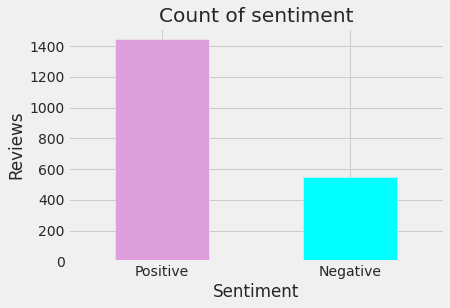

In [ ]:
result=newdf['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);
plt.title('Count of sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Reviews')

In [ ]:
print(newdf['Sentiment'].value_counts())

Positive    1445
Negative     547
Name: Sentiment, dtype: int64


Text(0, 0.5, 'count')

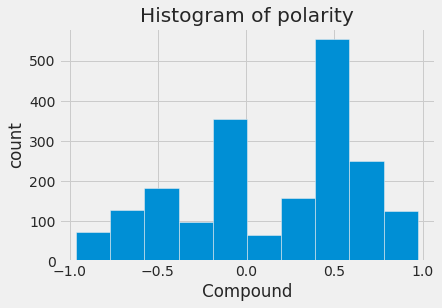

In [ ]:
newdf['compound'].plot(kind='hist')
plt.title('Histogram of polarity')
plt.xlabel('Compound')
plt.ylabel('count')

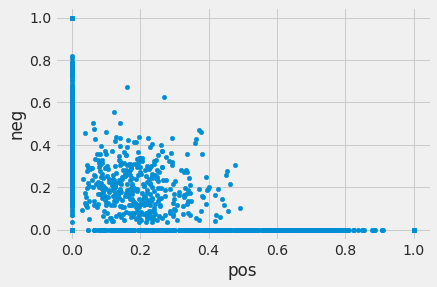

In [ ]:
newdf.plot.scatter(x='pos', y='neg')

In [ ]:
newdf.groupby('score')['compound'].describe()

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1,919.0,-0.131326,0.469353,-0.9631,-0.508250,-0.05720,0.153100,0.9337
2,114.0,0.128630,0.475333,-0.8052,-0.225900,0.19095,0.440400,0.9531
3,106.0,0.297280,0.371024,-0.8005,0.000000,0.42150,0.522675,0.8896
4,122.0,0.400658,0.290527,-0.8445,0.232225,0.43095,0.624900,0.9581
5,731.0,0.472698,0.243661,-0.7906,0.421500,0.47280,0.624900,0.9733


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


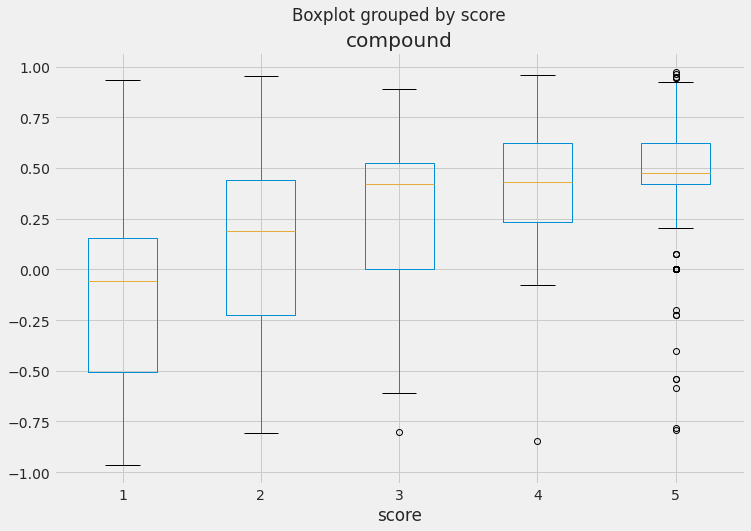

In [ ]:
newdf.boxplot(by='score', column='compound', figsize=(12,8))

Plotting the coumpound score against customer star review

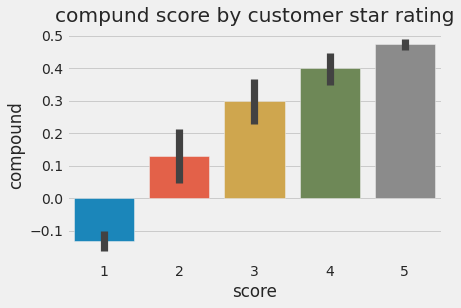

In [ ]:
!pip install seaborn
import seaborn as sns
ax =sns.barplot(data=newdf, x='score' , y='compound')
ax.set_title('compund score by customer star rating')
plt.show()

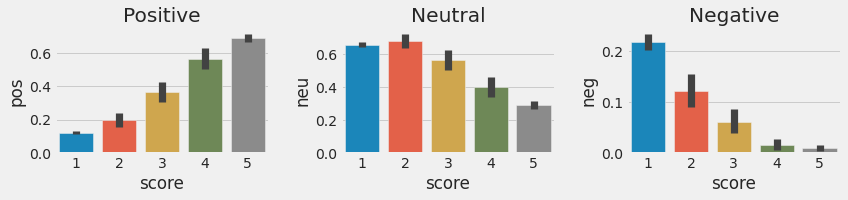

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=newdf, x='score', y='pos', ax=axs[0])
sns.barplot(data=newdf, x='score', y='neu', ax=axs[1])
sns.barplot(data=newdf, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()